In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [4]:
from sklearn.metrics import r2_score as r2_score_metric, mean_squared_error, mean_absolute_error
import numpy as np

def r2_score(y_true, y_pred):
    """
    Custom function to calculate and print R2 Score, RMSE, and MAE.
    """
    r2 = r2_score_metric(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"R2 Score: {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [6]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# EDA

In [7]:
df = pd.read_excel("/content/drive/MyDrive/Projects/24. SPEI Drought Index/Rangpur drought.xlsx")
df.head()

,Year,Month,Humidity,Rainfall,Min Temp,Max Temp,Solar Radiation,Sunshine,PET,Precepitition,SPEI-1,SPEI-3,SPEI-6,SPEI-9,SPEI-12
0,1990,1,84.00,1,11.60,24.23,125.51,6.20,18.14,1,-1.262278,0.000000,0.0,0.0,0.0
1,1990,2,76.29,57,13.89,25.43,129.36,6.58,20.30,57,1.507233,0.000000,0.0,0.0,0.0
2,1990,3,72.52,82,16.52,27.95,146.21,7.23,26.88,82,1.667062,1.816228,0.0,0.0,0.0
3,1990,4,79.20,134,20.51,29.37,164.72,6.24,29.49,134,0.844219,1.711505,0.0,0.0,0.0
4,1990,5,83.03,354,23.68,31.84,143.77,6.81,27.46,354,0.857969,1.548284,0.0,0.0,0.0


In [8]:
print(df.columns)

Index(['Year', 'Month', 'Humidity', 'Rainfall', 'Min Temp', 'Max Temp',
       'Solar Radiation', 'Sunshine', 'PET', 'Precepitition', 'SPEI-1',
       'SPEI-3', 'SPEI-6', 'SPEI-9', 'SPEI-12'],
      dtype='object')


In [9]:
print(df.describe())

             Year       Month    Humidity     Rainfall    Min Temp  \
count   396.00000  396.000000  396.000000   396.000000  396.000000   
mean   2006.00000    6.500000   80.457980   181.148990   20.433889   
std       9.53395    3.456419    5.684693   202.872275    5.342417   
min    1990.00000    1.000000   61.580000     0.000000    9.070000   
25%    1998.00000    3.750000   77.612500     4.000000   15.665000   
50%    2006.00000    6.500000   81.295000   118.500000   22.085000   
75%    2014.00000    9.250000   84.620000   316.000000   25.462500   
max    2022.00000   12.000000   90.300000  1035.000000   27.310000   

         Max Temp  Solar Radiation    Sunshine         PET  Precepitition  \
count  396.000000       396.000000  396.000000  396.000000     396.000000   
mean    29.766818       177.109040    5.981364   38.544924     181.148990   
std      3.258428        35.688189    1.634185   12.075606     202.872275   
min     20.270000        73.090000    1.730000   12.440000   

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             396 non-null    int64  
 1   Month            396 non-null    int64  
 2   Humidity         396 non-null    float64
 3   Rainfall         396 non-null    int64  
 4   Min Temp         396 non-null    float64
 5   Max Temp         396 non-null    float64
 6   Solar Radiation  396 non-null    float64
 7   Sunshine         396 non-null    float64
 8   PET              396 non-null    float64
 9   Precepitition    396 non-null    int64  
 10  SPEI-1           396 non-null    float64
 11  SPEI-3           396 non-null    float64
 12  SPEI-6           396 non-null    float64
 13  SPEI-9           396 non-null    float64
 14  SPEI-12          396 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 46.5 KB
None


# Preprocessing

In [11]:
features = df[['Humidity', 'Rainfall', 'Min Temp', 'Max Temp',
       'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']]
targets = df['SPEI-12']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 8)
X_test shape: (80, 8)


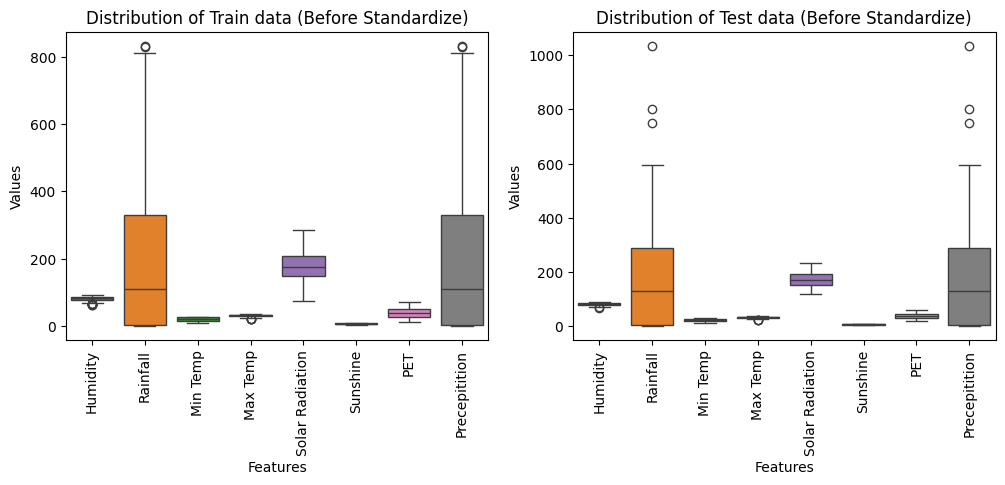

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(X_train)
plt.title("Distribution of Train data (Before Standardize)")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.subplot(1, 2, 2)
sns.boxplot(X_test)
plt.title("Distribution of Test data (Before Standardize)")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.show()

In [14]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_Train = scaler.fit_transform(features)
y_Train = targets

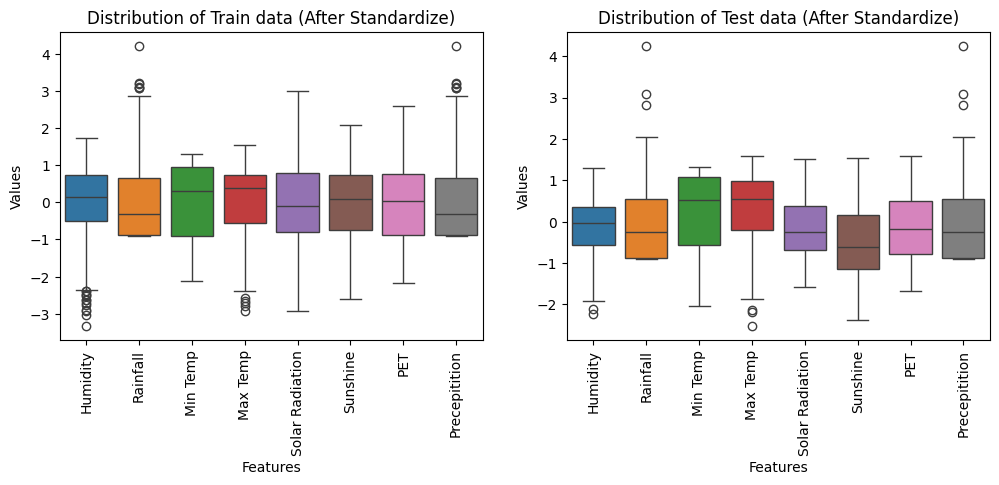

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(X_Train)
plt.title("Distribution of Train data (After Standardize)")
plt.xticks(ticks=range(len(features.columns)), labels=features.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Values")
plt.subplot(1, 2, 2)
sns.boxplot(X_test)
plt.title("Distribution of Test data (After Standardize)")
plt.xlabel("Features")
plt.xticks(ticks=range(len(features.columns)), labels=features.columns, rotation=90)
plt.ylabel("Values")
plt.show()

# Linear Reg

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_Train, y_Train)
y_pred = linear_model.predict(X_test)

In [18]:
accuracy_score = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")

R2 Score: -0.1755
Root Mean Squared Error (RMSE): 1.0047
Mean Absolute Error (MAE): 0.8088
Accuracy Score: None


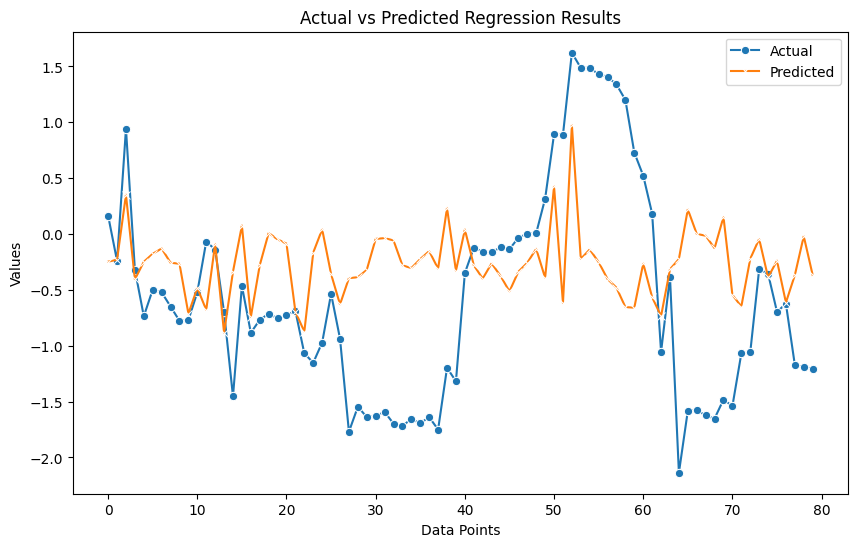

In [19]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Random Forest

In [20]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_Train, y_Train)
y_pred = random_forest_model.predict(X_test)

In [21]:
accuracy_score = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")

R2 Score: 0.4902
Root Mean Squared Error (RMSE): 0.6617
Mean Absolute Error (MAE): 0.5307
Accuracy Score: None


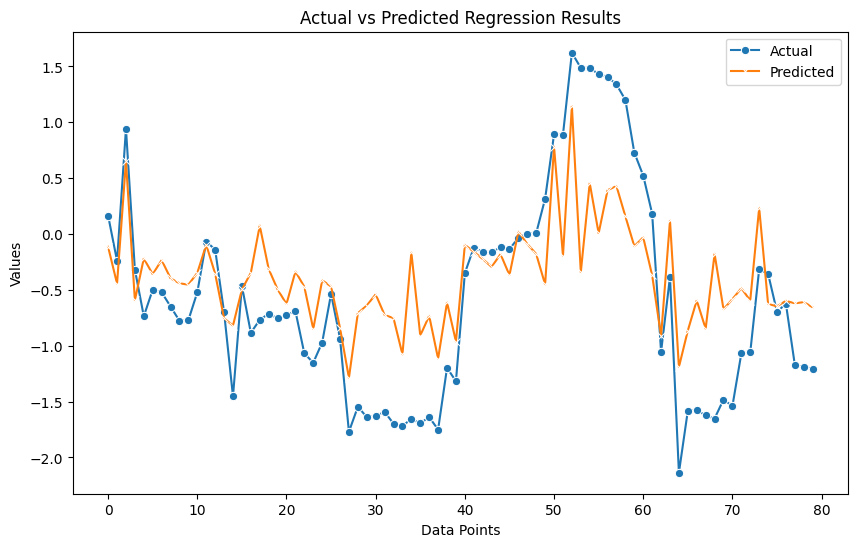

In [22]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Decision Tree

In [23]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_Train, y_Train)
y_pred = decision_tree_model.predict(X_test)

In [24]:
accuracy_score = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")

R2 Score: 0.1436
Root Mean Squared Error (RMSE): 0.8576
Mean Absolute Error (MAE): 0.3851
Accuracy Score: None


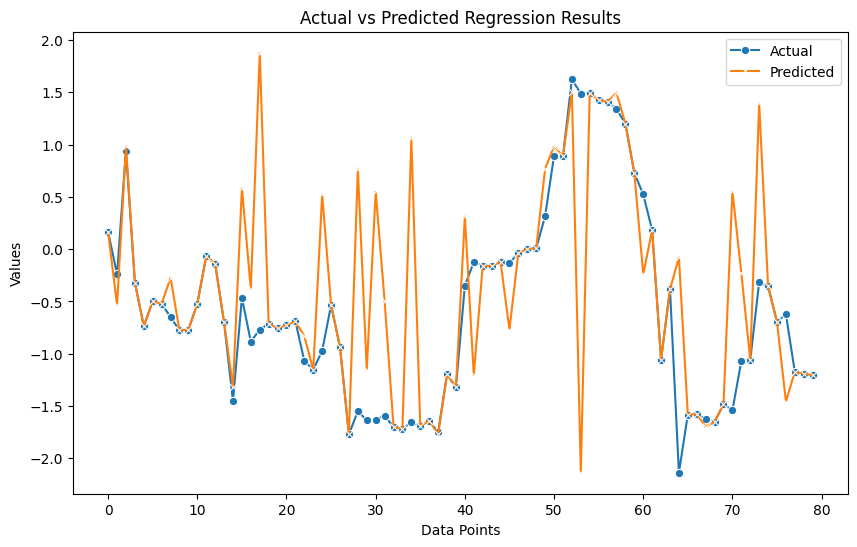

In [25]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SVR

In [26]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_Train, y_Train)
y_pred = svr_model.predict(X_test)

In [27]:
accuracy_score = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")

R2 Score: -0.1313
Root Mean Squared Error (RMSE): 0.9857
Mean Absolute Error (MAE): 0.7865
Accuracy Score: None


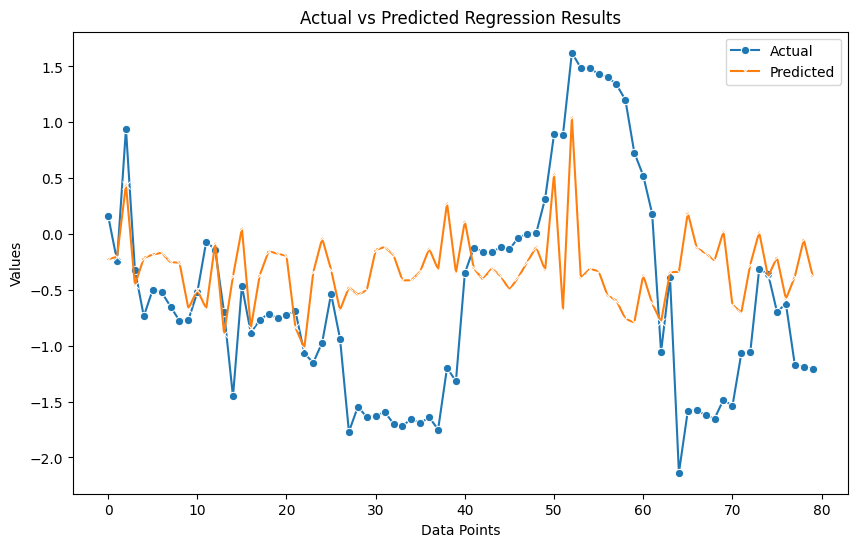

In [28]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# KNN

In [29]:
kneighbors_model = KNeighborsRegressor(n_neighbors=5)
kneighbors_model.fit(X_Train, y_Train)
y_pred = kneighbors_model.predict(X_test)

In [30]:
accuracy_score = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")

R2 Score: 0.0326
Root Mean Squared Error (RMSE): 0.9115
Mean Absolute Error (MAE): 0.7406
Accuracy Score: None


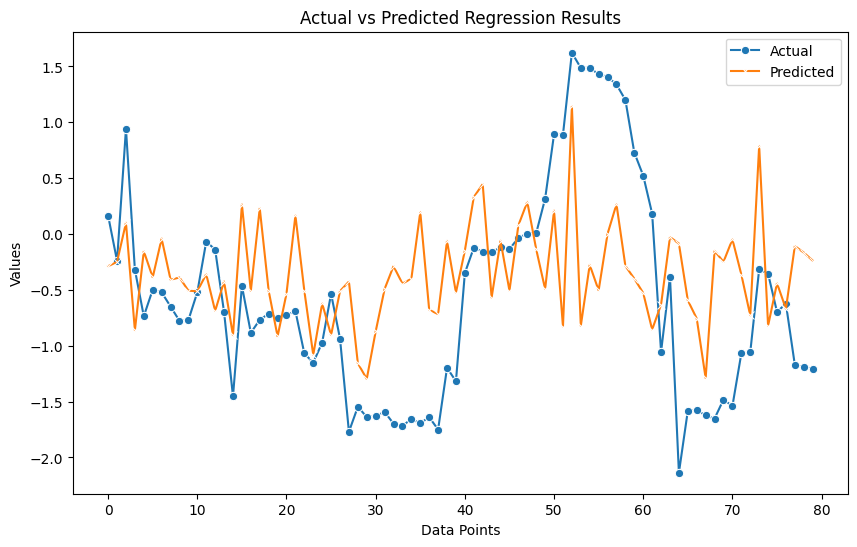

In [31]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# ANN

In [32]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


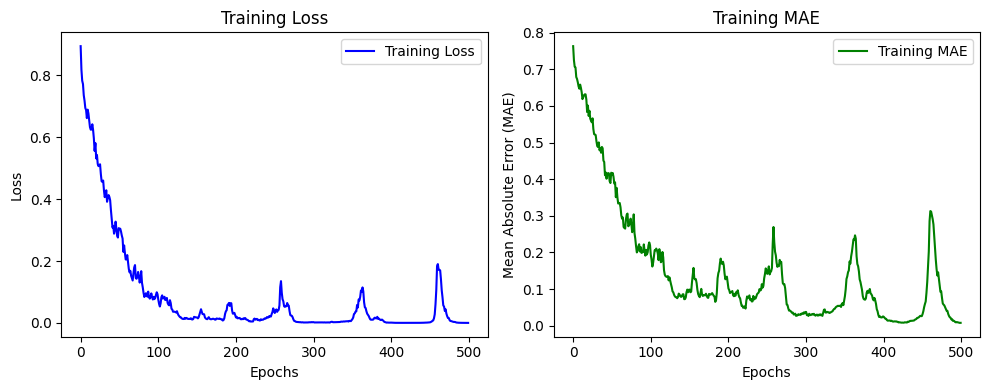

In [33]:
# Retrieve training history
history_dict = history.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [35]:
accuracy_score = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")

R2 Score: 0.9608
Root Mean Squared Error (RMSE): 0.1834
Mean Absolute Error (MAE): 0.1235
Accuracy Score: None


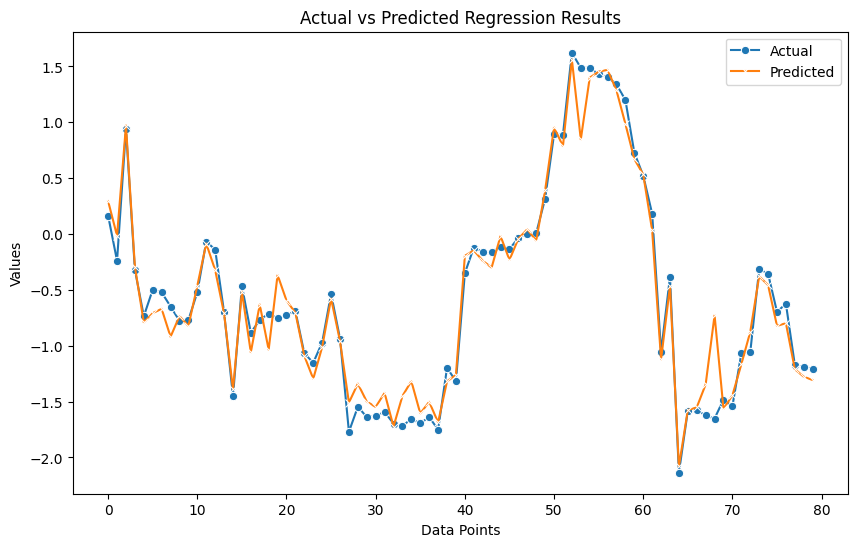

In [36]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-1

In [37]:
features = df[['Humidity', 'Rainfall', 'Min Temp', 'Max Temp',
       'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']]
targets = df['SPEI-1']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 8)
X_test shape: (80, 8)


In [39]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [41]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi1 = model1.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


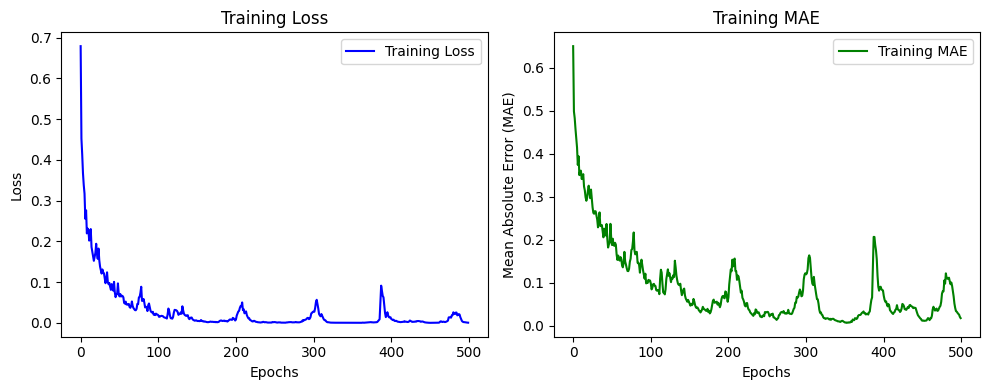

In [42]:
# Retrieve training history
history_dict = history_spi1.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
y_pred = model1.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score1 = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score1}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
R2 Score: 0.9904
Root Mean Squared Error (RMSE): 0.1061
Mean Absolute Error (MAE): 0.0883
Accuracy Score: None


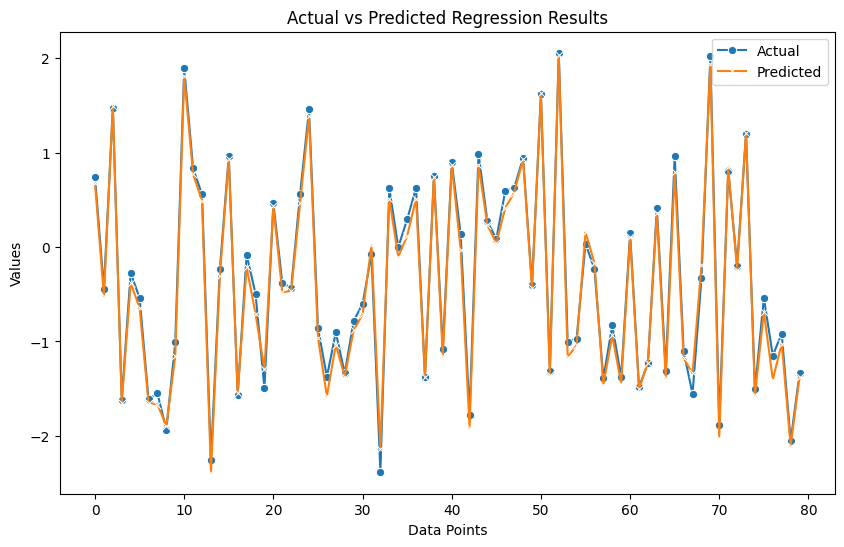

In [44]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-3

In [45]:
features = df[['Humidity', 'Rainfall', 'Min Temp', 'Max Temp',
       'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']]
targets = df['SPEI-3']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 8)
X_test shape: (80, 8)


In [47]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [49]:
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi3 = model3.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


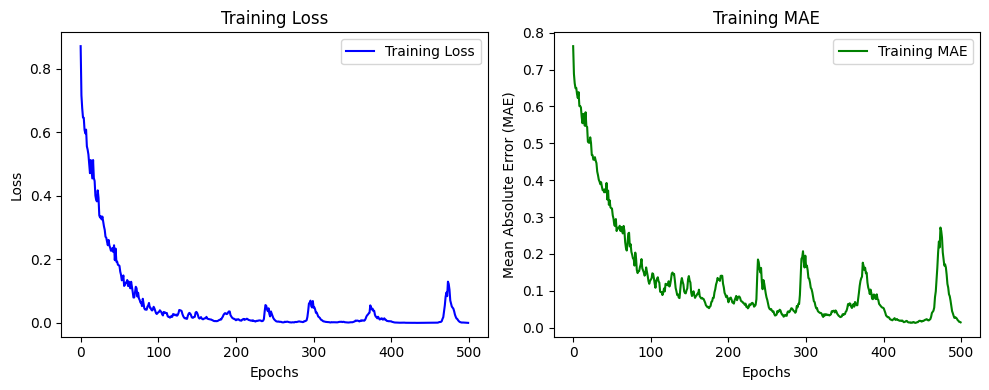

In [50]:
# Retrieve training history
history_dict = history_spi3.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
y_pred = model3.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score3 = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score3}")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
R2 Score: 0.9687
Root Mean Squared Error (RMSE): 0.1770
Mean Absolute Error (MAE): 0.1049
Accuracy Score: None


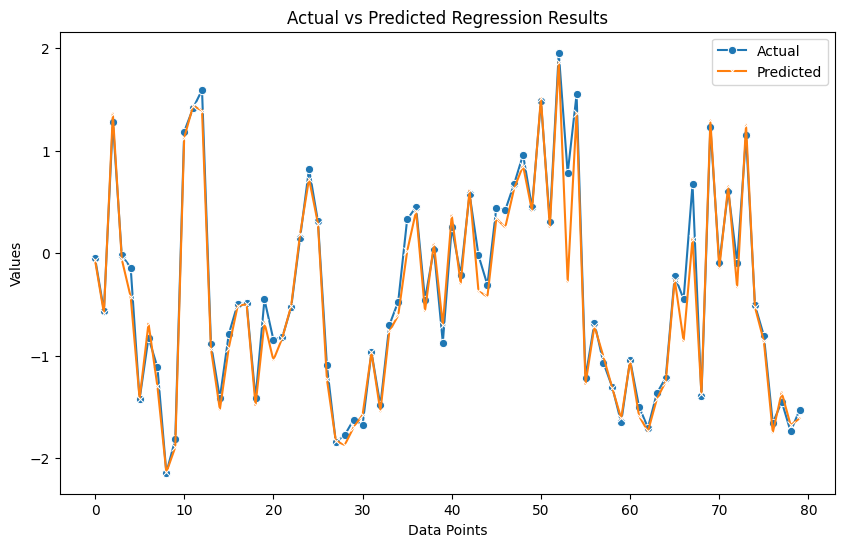

In [52]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-6

In [53]:
features = df[['Humidity', 'Rainfall', 'Min Temp', 'Max Temp',
       'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']]
targets = df['SPEI-6']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 8)
X_test shape: (80, 8)


In [55]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [57]:
model6 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model6.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi6 = model6.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


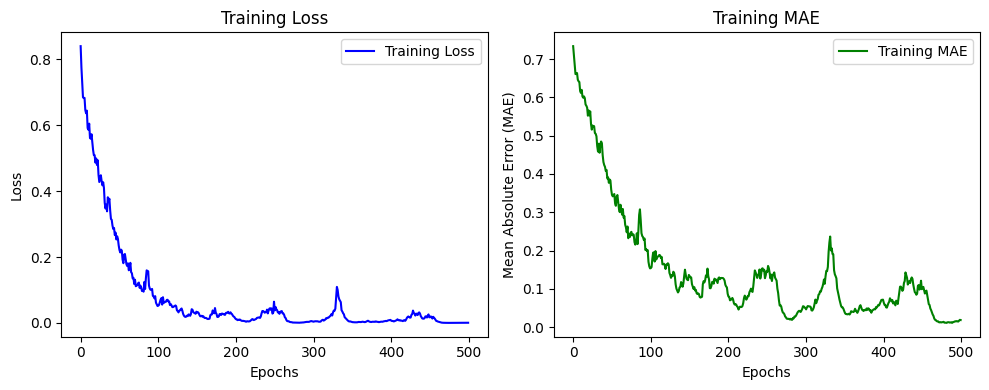

In [58]:
# Retrieve training history
history_dict = history_spi6.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
y_pred = model6.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score6 = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score6}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
R2 Score: 0.9574
Root Mean Squared Error (RMSE): 0.2055
Mean Absolute Error (MAE): 0.1283
Accuracy Score: None


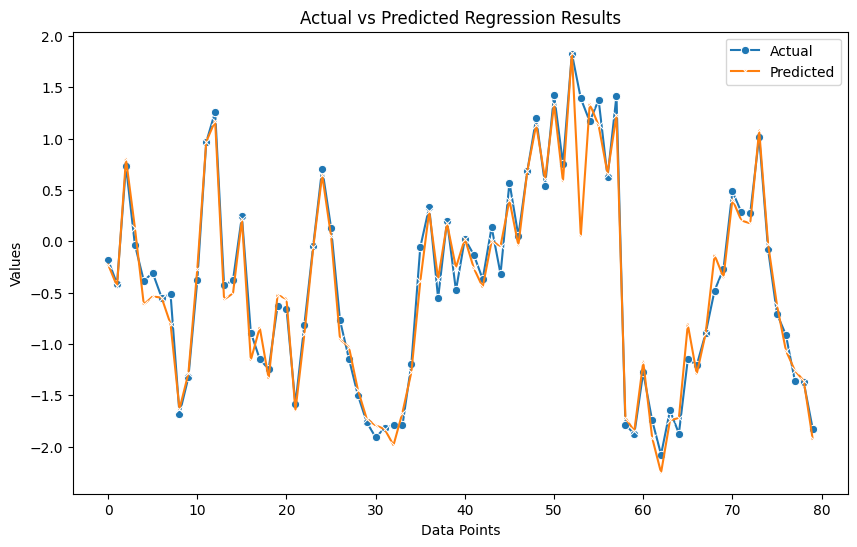

In [60]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-9

In [61]:
features = df[['Humidity', 'Rainfall', 'Min Temp', 'Max Temp',
       'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']]
targets = df['SPEI-9']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 8)
X_test shape: (80, 8)


In [63]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [65]:
model9 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model9.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi9 = model9.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


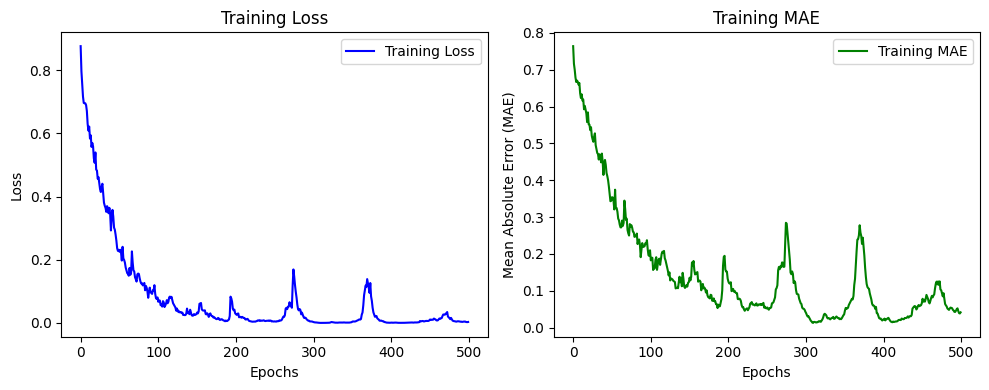

In [66]:
# Retrieve training history
history_dict = history_spi9.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
y_pred = model9.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score9 = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score9}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
R2 Score: 0.9446
Root Mean Squared Error (RMSE): 0.2243
Mean Absolute Error (MAE): 0.1362
Accuracy Score: None


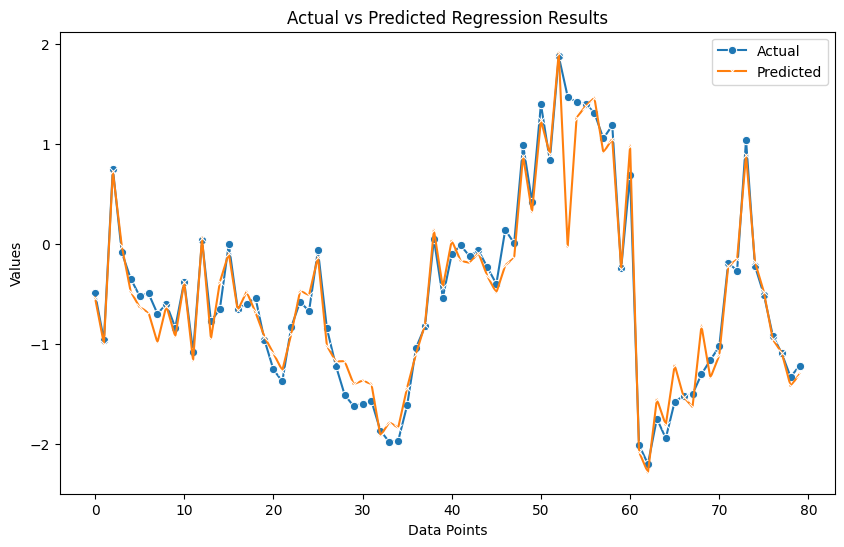

In [68]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-12

In [69]:
features = df[['Humidity', 'Rainfall', 'Min Temp', 'Max Temp',
       'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']]
targets = df['SPEI-12']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 8)
X_test shape: (80, 8)


In [71]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [73]:
model12 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model12.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi12 = model12.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


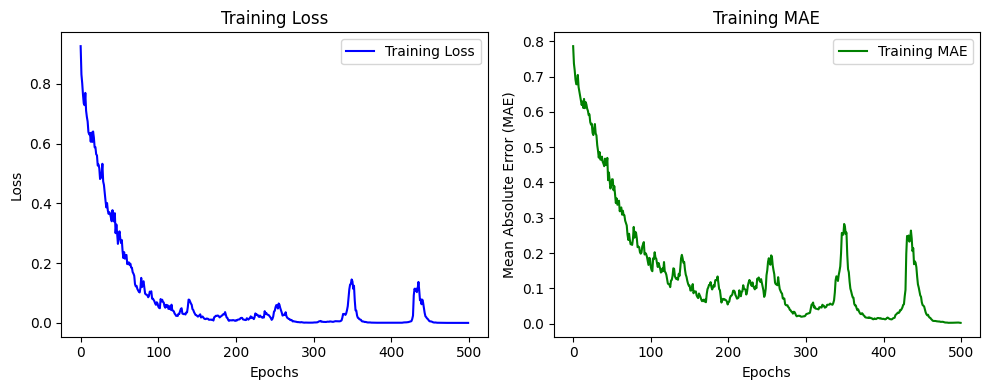

In [74]:
# Retrieve training history
history_dict = history_spi12.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
y_pred = model12.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score12 = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score12}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R2 Score: 0.9785
Root Mean Squared Error (RMSE): 0.1359
Mean Absolute Error (MAE): 0.1040
Accuracy Score: None


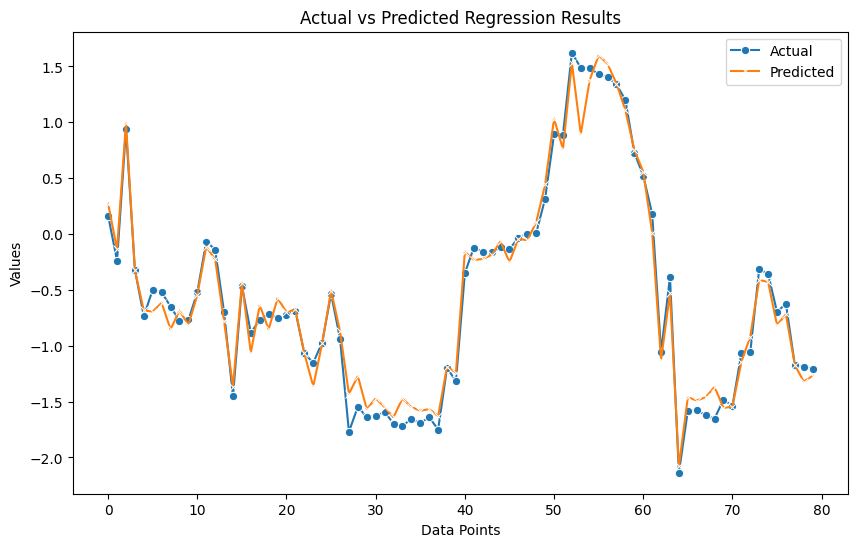

In [76]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Summary

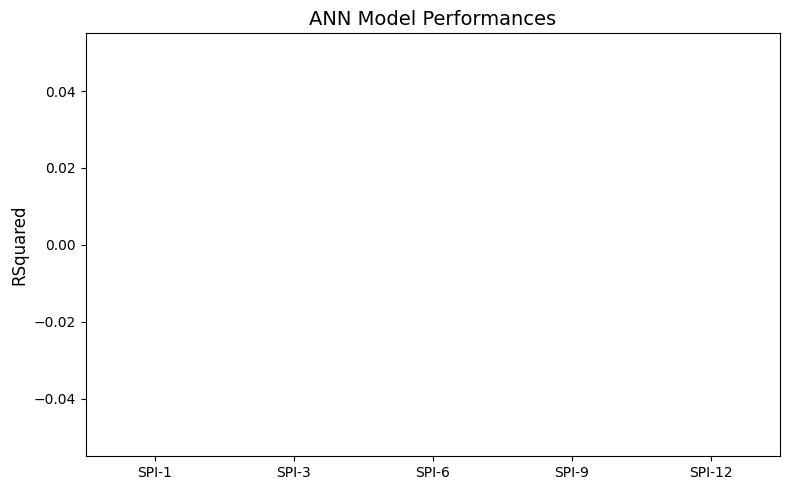

In [77]:
categories = ['SPI-1', 'SPI-3', 'SPI-6', 'SPI-9', 'SPI-12']
values = [accuracy_score1, accuracy_score3, accuracy_score6, accuracy_score9, accuracy_score12]

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values)

# Add title and labels
plt.title('ANN Model Performances', fontsize=14)
plt.ylabel('RSquared', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()